In [1]:
import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import sys
sys.path.append("..")
from datasets.city import build_city_image_dataset
from infi_tf import load_infi_skip
import numpy as np

In [41]:
infi = load_infi_skip("weights/vc1k/20220403-171816-Epoch20.h5")
x_test = build_city_image_dataset(list_path="../datasets/vc1k_release_list_test.txt",
                                 root_path="../datasets/vc1k_release/").batch(10)
y_pred = infi.predict(x_test)

In [42]:
y_true = np.load("../datasets/vc_y_test.npy")
print(y_true.shape)

(500, 1)


In [43]:
y_pred[:10], y_true[:10], y_pred.shape

(array([[0.7884791 ],
        [0.78731036],
        [0.78195965],
        [0.7155861 ],
        [0.27131033],
        [0.18088084],
        [0.17609447],
        [0.17478761],
        [0.18577886],
        [0.18216947]], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.]]),
 (500, 1))

(0.718, 1.0)


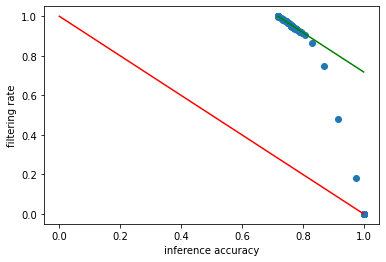

In [44]:
def eval_skip(y_true, y_pred, threshold=0.5):
    wrong_count = 0
    filtered_count = 0
    
    for y1, y2 in zip(y_true, y_pred):
        
        if y1[0] == 1. and y2[0] < threshold:
            wrong_count += 1
            
        if y2[0] < threshold:
            filtered_count += 1
    
    total_num = len(y_true)
    filtered_rate = filtered_count / total_num
    label_acc = 1. - wrong_count / total_num
    
    return label_acc, filtered_rate

TN = 1.0 - y_true.sum() / len(y_true)
acc_list = []
r_list = []
for threshold in np.arange(0., 1.01, 0.01):
    acc, r = eval_skip(y_true, y_pred, threshold)
    acc_list.append(acc)
    r_list.append(r)

plt.scatter(acc_list, r_list)
worst_x = [0., 1.]
worst_y = [1., 0.]
optimal_x = [TN, 1.]
optimal_y = [1., TN]
plt.plot(worst_x, worst_y, 'r')
plt.plot(optimal_x, optimal_y, 'g')
plt.xlabel("inference accuracy")
plt.ylabel("filtering rate")
plt.show()